## Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from matplotlib.backends.backend_agg import FigureCanvasAgg
print('Import Complete')


Import Complete


## Preparing the data

In [3]:
# Loading the data
data = pd.read_csv('./datasets/housing.csv')
# Get a glimpse of the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


It seems like the data is about house residents.

In [4]:
# Checking the missing values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
print('Number of rows: ', len(data))

Number of rows:  20640


The only column that has misisng values are `total_bedrooms` (207 of 20640 rows). We're going to fill it with the mean of the `total_bedrooms` itself.

In [6]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Checking if the `ocean_proximity` can be converted to a categorical value.

In [10]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
set(data['ocean_proximity'].values)

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

We'll try to convert the `ocean_proximity` to a categorical value.

In [12]:
data['ocean_proximity'] = data['ocean_proximity'].map({'<1H OCEAN': 1, 'INLAND': 2, 'ISLAND': 3, 'NEAR BAY': 4, 'NEAR OCEAN': 5})

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


#### Checking the correlation between column pairs

In [14]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


#### Exploring the data

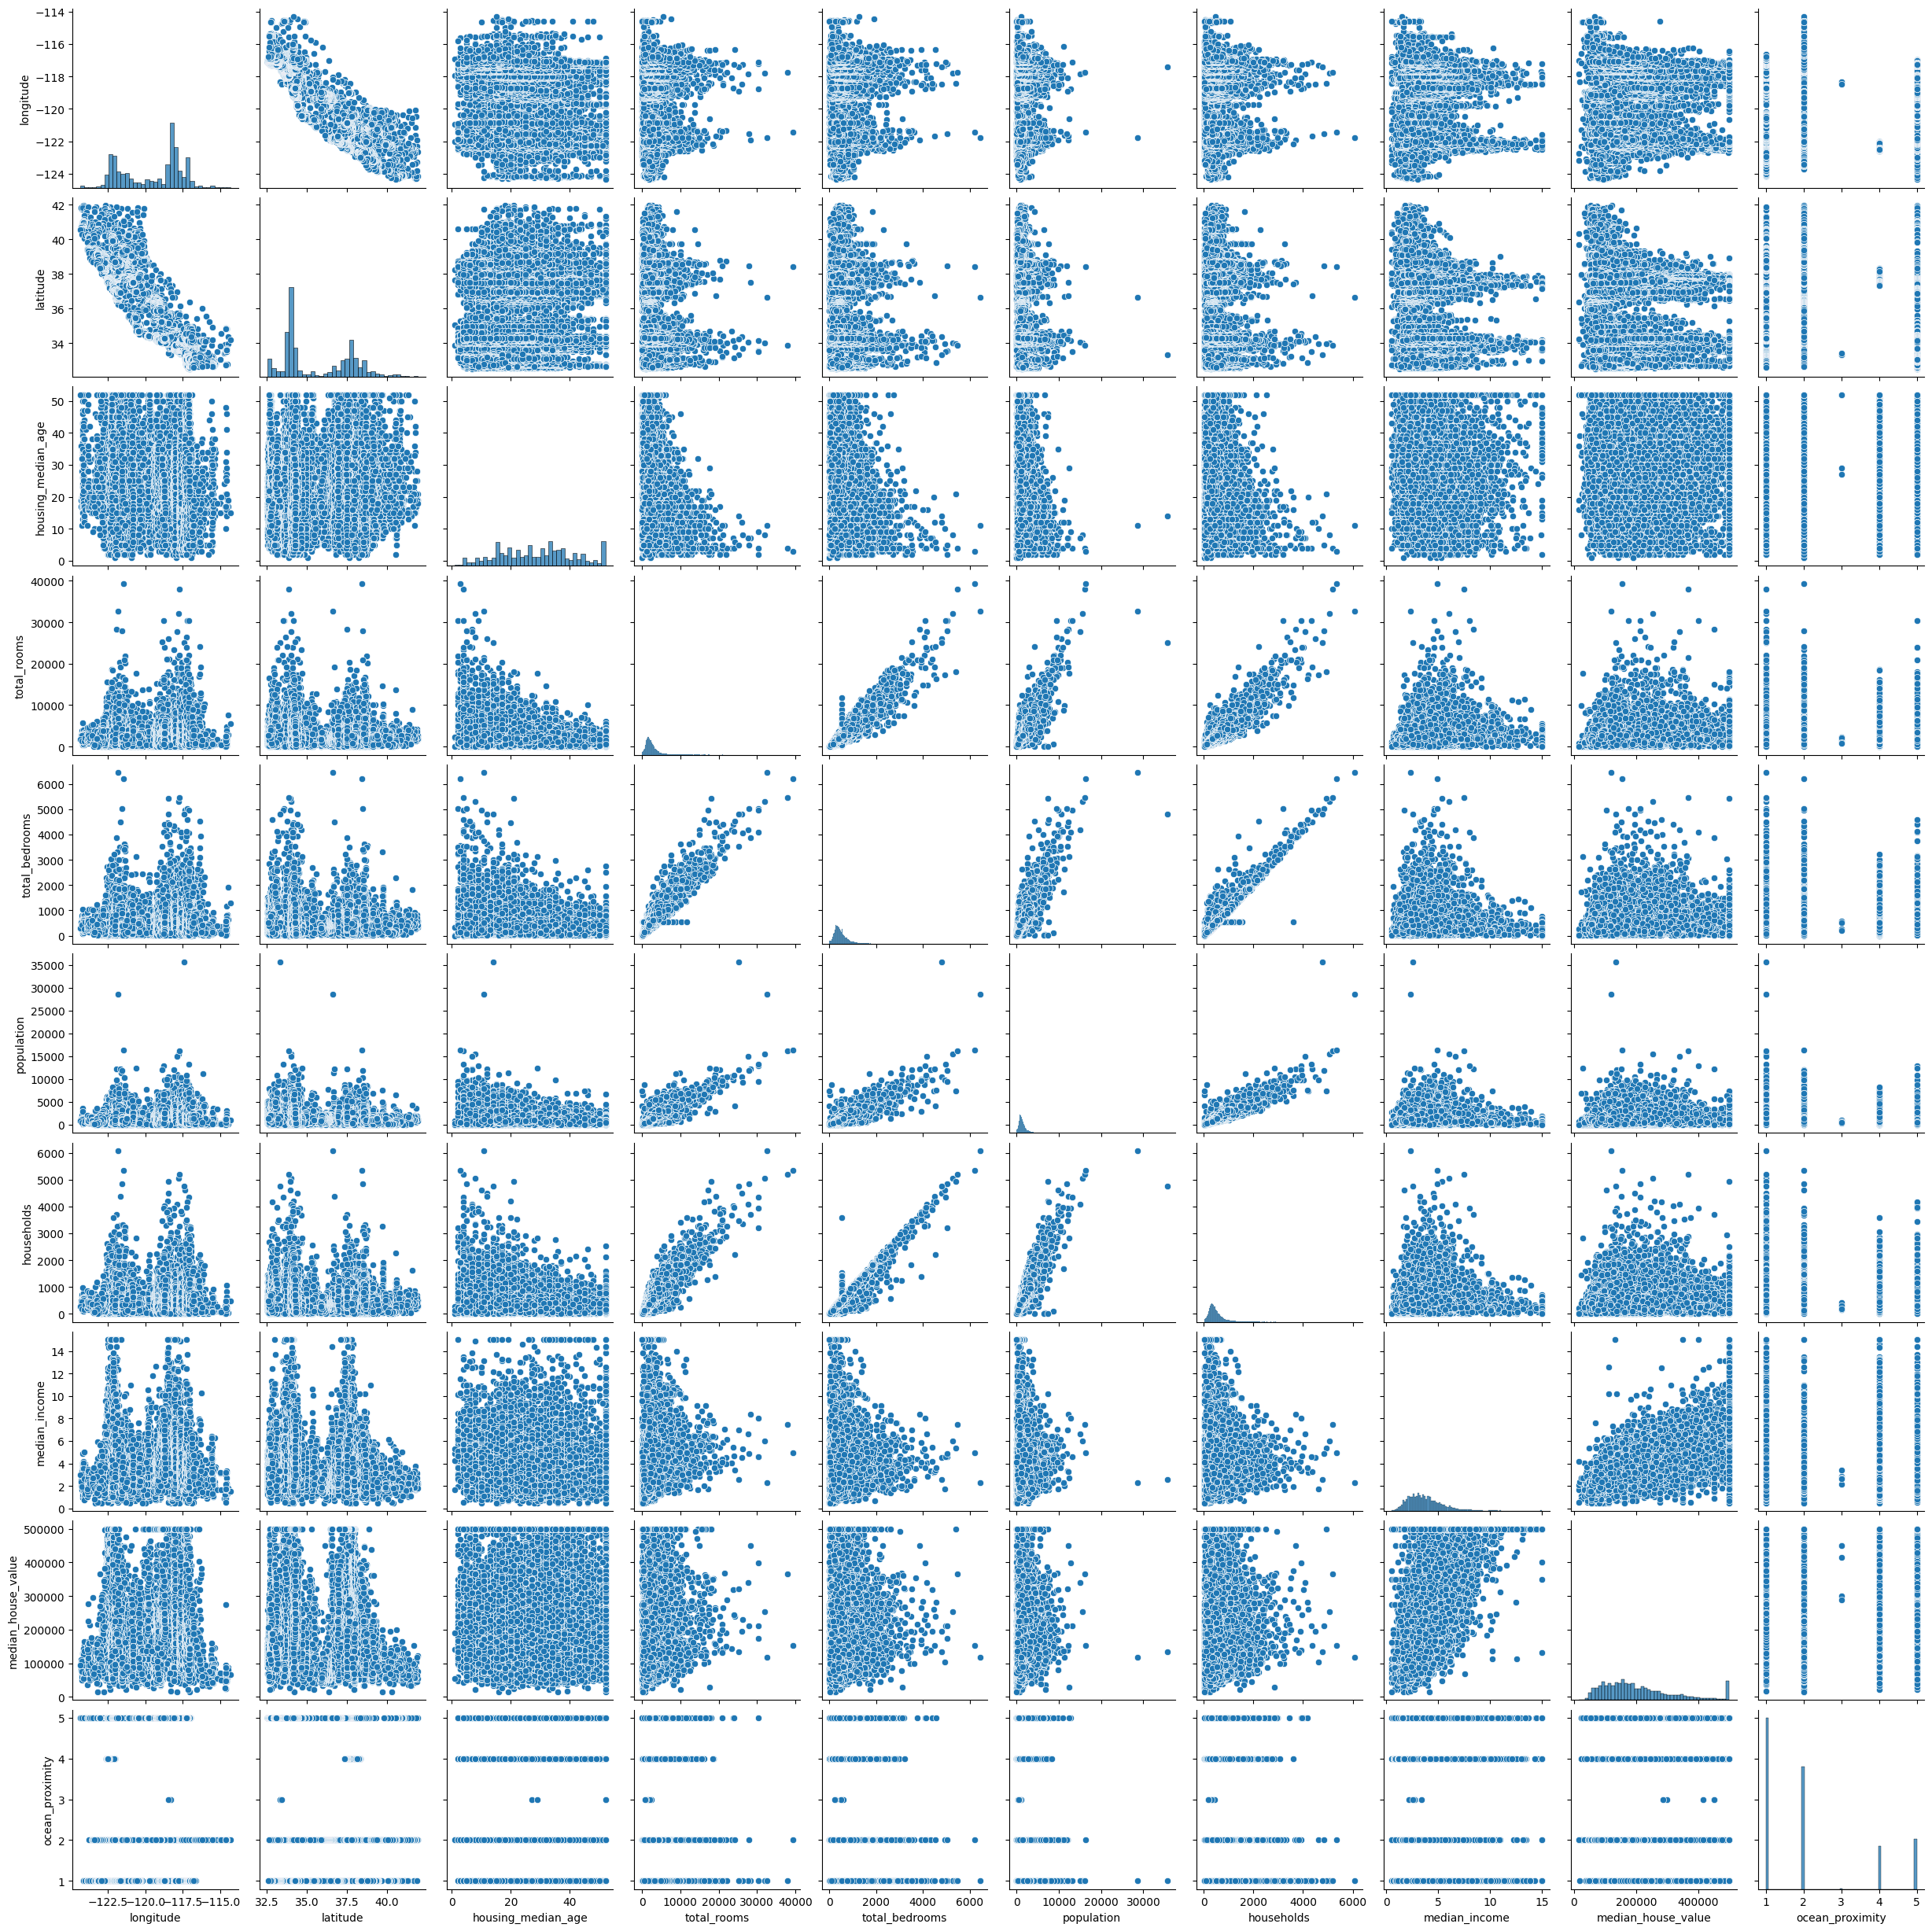

In [15]:
sns.pairplot(data)

#### Scaling the data

In [16]:
class StandardScaler:
    def __init__(self):
        self._mean = None # Mean
        self._var = None # Variance

    def fit(self, X: np.ndarray):
        self._mean = np.mean(X, axis=0)
        self._var = np.var(X, axis=0)
    
    def transform(self, X: np.ndarray):
        scaled_X = (X - self._mean) / np.sqrt(self._var)
        return scaled_X
    
    def fit_transform(self, X: np.ndarray):
        self.fit(X)
        return self.transform(X)

In [17]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(np.asarray(data.values.tolist()))
scaled_values

array([[-1.32783522,  1.05254828,  0.98214266, ...,  2.34476576,
         2.12963148,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  2.33223796,
         1.31415614,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.7826994 ,
         1.25869341,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -1.14259331,
        -0.99274649, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -1.05458292,
        -1.05860847, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.78012947,
        -1.01787803, -0.11673923]])

In [18]:
scaled_data = pd.DataFrame(scaled_values, columns=data.columns)
print("Dataset to be used in further processing:")
scaled_data

Dataset to be used in further processing:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-1.115804,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-1.124470,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.992746,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-1.058608,-0.116739


#### Apllying PCA

In [19]:
class PCA:
    def __init__(self, n_features) -> None:
        self.n_features = n_features # Number of features
        self._features = None
        self._mean = None
    
    def fit(self, X: np.ndarray):
        self._mean = np.mean(X, axis=0)
        
        # Center the data
        X_centered: np.ndarray = X - self._mean
        
        # Calculate the covariance matrix
        covariance_matrix = np.cov(X_centered.T)
        
        # Calculate the eigenvalues and eigencevtors
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[indices]
        
        self._features = eigenvectors[:self.n_features]
    
    def transform(self, X: np.ndarray):
        # Center the data
        X_centered: np.ndarray = X - self._mean
        
        # Project the data onto principal features
        projected_data = np.dot(X_centered, self._features.T)
        
        return projected_data
    
    def fit_transform(self, X: np.ndarray):
        self.fit(X)
        return self.transform(X)

In [20]:
pca = PCA(2)
pca_values = pca.fit_transform(scaled_values)

pca_data = pd.DataFrame(pca_values, columns=['Col1', 'Col2'])
print("Data after dimensionality reduction:")
pca_data

Data after dimensionality reduction:


,Col1,Col2
0,-2.033117,1.401935
1,2.952565,2.091951
2,-1.954361,1.576654
3,-1.917393,1.667495
4,-1.785230,1.773259
...,...,...
20635,-1.119253,1.703992
20636,-1.929342,1.552882
20637,-0.515602,1.767950
20638,-0.928796,1.746288


In [21]:
X = pca_values
len(X)

20640

Let's check if there's any outliers.

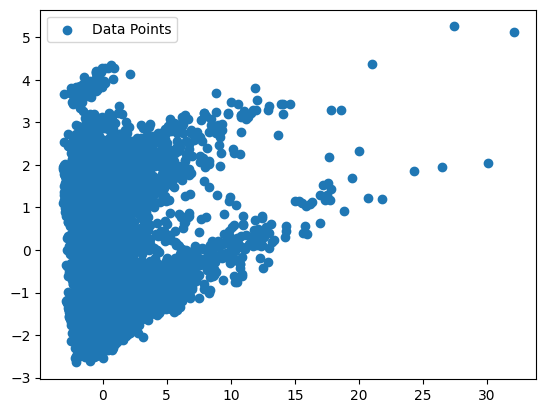

In [22]:
plt.scatter(X[:, 0], X[:, 1], label="Data Points")
plt.legend()
plt.show()

We'll use the z-score method to clean the outliers.

In [46]:
z_scores = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
threshold = 3 # Default threshold for outliers (greater than 3 or less than -3)

outliers_indices = np.where(np.abs(z_scores) > threshold) # Outliers for each features
print("Outliers Indices: ", outliers_indices)

all_outliers_indices = np.unique(np.concatenate(outliers_indices))
print("All Outliers Indices: ", all_outliers_indices)

X = np.delete(X, all_outliers_indices, axis=0)

Outliers Indices:  (array([  100,   480,   566,   698,   810,   921,   928,   939,   985,
        1038,  1040,  1332,  1353,  1466,  1469,  1511,  1524,  1531,
        1537,  1556,  1571,  1649,  1961,  2230,  2232,  2955,  3362,
        3395,  3396,  3398,  3450,  3472,  3645,  3675,  3825,  3909,
        3929,  3942,  3947,  3988,  4295,  4499,  4918,  5119,  5124,
        5141,  5157,  5163,  5180,  5482,  5564,  5585,  5660,  5684,
        5758,  5764,  5805,  5907,  5940,  5959,  6015,  6101,  6109,
        6121,  6146,  6155,  6304,  6569,  6600,  6687,  7410,  7418,
        7436,  7634,  7670,  7711,  8038,  8412,  8437,  8566,  8567,
        8781,  8829,  8851,  8991,  9013,  9047,  9306,  9442,  9443,
        9576,  9631, 10021, 10036, 10142, 10193, 10214, 10304, 10505,
       10516, 10528, 10998, 11025, 11128, 11135, 11375, 11405, 11650,
       11712, 11727, 11791, 11829, 11913, 11919, 11925, 11941, 12162,
       12213, 12351, 12402, 12438, 12462, 12481, 12538, 12569, 12648,


## Making the model

In [24]:
class KMeans:
    def __init__(self, k, max_iters=300):
        self.k = k
        self.max_iters = max_iters
        self._centroids = None
        self._labels = None
    
    def _assign_labels(self, X: np.ndarray, centroids: np.ndarray):
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X: np.ndarray, labels: np.ndarray):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = np.mean(X[labels == i], axis=0)
        return centroids
    
    def _calculate_inertia(self, X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
        inertia = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            # Calculate the Sum of Squared Distance
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
        
        return inertia
    
    def fit(self, X: np.ndarray):
        # Initialize centroid in random position
        centroids: np.ndarray = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X, centroids)
            # Update centroids based on the mean of data points in each cluster
            new_centroids = self._update_centroids(X, labels)
            # If centroids do not change, exit
            if np.all(centroids == new_centroids):
                break
            
            centroids = new_centroids
        
        self._centroids = centroids
        self._labels = labels
        self._inertia = self._calculate_inertia(X, centroids, labels)
    

We don't know what's the right number of `k` yet, so we'll perform the Elbow Method.

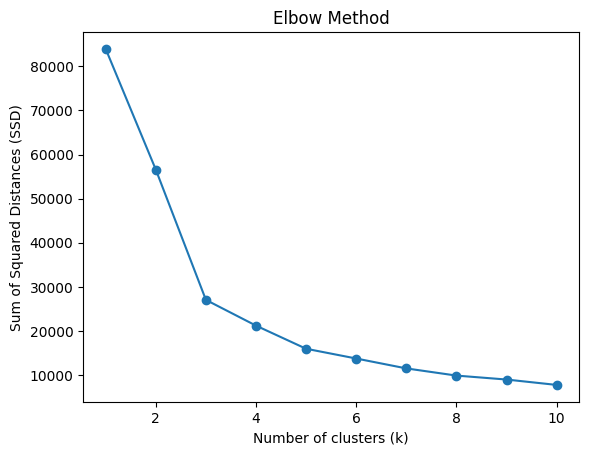

In [25]:
def elbow_method(max_k=10):
    # Sum of Square Distances
    ssd = list()
    max_k = 10

    for k in range(1, max_k+1):
        model = KMeans(k)
        model.fit(X)
        ssd.append(model._inertia)
    
    plt.plot(range(1, max_k + 1), ssd, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method')
    plt.show()

elbow_method()

As we can see, the value of SSD drops significantly when the value of `k` are at 3. So we'll use 3 as the value of `k`. 

In [26]:
def plot_clusters(X: np.ndarray, centeroids: np.ndarray, labels: np.ndarray):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')
    plt.scatter(centeroids[:, 0], centeroids[:, 1], c='red', marker='x', s=100, label='Centeroids')
    plt.title('Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
model = KMeans(3)
model.fit(X)
centeroids = model._centroids
labels = model._labels

In [39]:
centeroids

array([[-0.84132359,  1.46322891],
       [ 2.52548173,  0.00285761],
       [-0.46850929, -1.21674856]])

In [40]:
np.unique(labels)

array([0, 1, 2], dtype=int64)

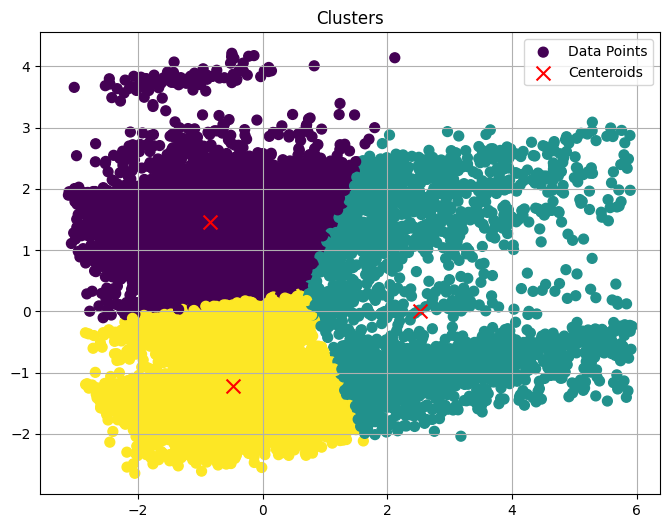

In [41]:
plot_clusters(X, centeroids, labels)

#### Evaluating the model

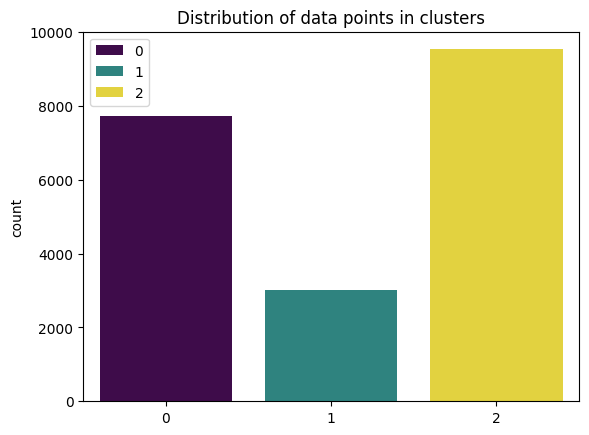

In [42]:
sns_plot_distribution = sns.countplot(x=model._labels, palette='viridis', hue=model._labels)
sns_plot_distribution.set_title('Distribution of data points in clusters')
plt.show()

Let's try to explore the correlation between number of households and the median income of a certain residents.

In [48]:
data_wo_outliers = data.drop(all_outliers_indices)
len(data_wo_outliers) == len(X) 

False